# 전처리

In [1]:
import numpy as np
import csv
#csv는 엑셀과 달리 , 를 통해 데이터를 구분

In [2]:
#given cities
cities = []
#solution
sol = []

# Euclidean distance measuring function

In [3]:
def distance(x,y):
    dist = np.linalg.norm(np.array(x)- np.array(y))
    return dist 
# np.linalg.norm -> L2 norm 벡터 p,q의 직선 거리 
# (x^2 + y^2)^(1/2)

# 데이터를 가져오기 및 확인

In [4]:
with open('example_solution.csv', mode= 'r', newline = '') as solution:
    
    # mode r -> 읽기 모드이다
    #csv의 행단위로 데이터를 출력
    #각 line은 ㅣist형식으로 되어있다
    #newline = '' 데이터가 띄어쓰기 없이 들어간다

    #read solution sequence -> 즉 example_solution을 읽어드림
    reader = csv.reader(solution)
    for row in reader:
        #print(row[0]) #0행의 숫자들
        sol.append(int(row[0]))
        if(len(sol) < 10):
            print(sol[0:5])
    print('#########################################################################')
    print(sol[0:15])

[760]
[760, 21]
[760, 21, 950]
[760, 21, 950, 122]
[760, 21, 950, 122, 807]
[760, 21, 950, 122, 807]
[760, 21, 950, 122, 807]
[760, 21, 950, 122, 807]
[760, 21, 950, 122, 807]
#########################################################################
[760, 21, 950, 122, 807, 4, 277, 423, 688, 241, 494, 605, 499, 527, 656]


# 1. get solution sequence and reorfering (sort from 0)

In [5]:
with open('example_solution.csv', mode= 'r', newline = '') as solution:
    
    # mode r -> 읽기 모드이다
    #csv의 행단위로 데이터를 출력
    #각 line은 ㅣist형식으로 되어있다
    #newline = '' 데이터가 띄어쓰기 없이 들어간다

    #read solution sequence -> 즉 example_solution을 읽어드림
    reader = csv.reader(solution)
    for row in reader:
        sol.append(int(row[0]))
    print('The index of 0 is :',sol.index(0))    
    #reordering solution sequence
    idx = sol.index(0) # 0이라는 숫자의 index
    
    front = sol[idx:]
    back = sol[0:idx]
    
    print('The front 0~20 is : ',front[0:20])
    print('/////////////////////////////////////////////////////////////////////////////////////////////////////////////')
    print('The back 0~20 is : ',back[0: 20])
    sol = front + back
    
    #expand 0 city (start) for simplicity
    sol.append(int(0))

The index of 0 is : 189
The front 0~20 is :  [0, 934, 200, 370, 524, 262, 982, 902, 71, 806, 744, 958, 430, 153, 81, 140, 786, 837, 634, 259]
/////////////////////////////////////////////////////////////////////////////////////////////////////////////
The back 0~20 is :  [760, 21, 950, 122, 807, 4, 277, 423, 688, 241, 494, 605, 499, 527, 656, 29, 872, 753, 165, 948]


즉 0을 기준으로 앞과 뒤를 짤라서 0 부터 시작하게 끔 자르고 마지막은 0에 도달 해야 하니깐 0을 추가                            
ex) 1 2 3 0 4 5 6             
front = 0 4 5 6           
back = 1 2 3           
sol = 0 4 5 6 1 2 3         

sol.append(int(0)) 
->최종 결과 0 4 5 6 1 2 3 0

위의 예시에서는         
0 의 index 값이 189 이므로     
front 에 189 ~ 999 index에 해당하는 숫자가 들어가고        
back 에 0 ~ 188 index에 해당하는 숫자가 들어간다

# 2. get TSP city map

In [6]:
with open('TSP.csv', mode = 'r', newline='') as tsp:
    #마찬가지로 읽기 방식으로 TSP.csv를 가져온다 -> 0행에는 x좌표 1행에는 y 좌표가 들어 있음
    
    #read TSP city map
    reader = csv.reader(tsp)
    for row in reader: # -> 가로 축으로 읽으므로 각 열 별로[x,y] 형태로 들어가게 된다
        cities.append(row)
print('cities 에 들어간 원소의 개수 :',len(cities))
print(cities[:25])

cities 에 들어간 원소의 개수 : 1000
[['53.25009344431329', '22.444885209100597'], ['21.570928175048255', '17.44707561216037'], ['72.16107675668404', '85.88179688723211'], ['52.59628100814437', '68.0997652916171'], ['99.55503411642916', '89.03868014012214'], ['45.263493711035', '24.433107718919345'], ['51.65884282004931', '90.10642634366273'], ['89.7286579150431', '69.21655768344208'], ['39.00003159887097', '80.55196125207841'], ['35.59526184197473', '14.05610647225216'], ['66.19318558706838', '55.68426760836053'], ['34.1551559598477', '85.84359753107817'], ['37.75840849411198', '8.948084373549136'], ['65.16521495804488', '93.65696789745532'], ['42.69022506258199', '92.09116283653597'], ['34.978245803048665', '90.63114224147267'], ['31.624449741999662', '37.20161513918061'], ['64.27557457661524', '47.52318749669915'], ['83.64758869867107', '0.8456953312116822'], ['66.90344399989151', '50.71682553053572'], ['16.884423905642787', '87.22366700571314'], ['87.5480501416314', '69.49436954110595'], ['5

# 3. evaluate solution cost

In [7]:
total_cost = 0

for idx in range(len(sol)-1): #0~ 999 까지
    
    #get city positions
    pos_city_1 = [float(cities[sol[idx]][0]), float(cities[sol[idx]][1])] #현재 node의 좌표를 float형으로 가져옴
    pos_city_2 = [float(cities[sol[idx+1]][0]), float(cities[sol[idx+1]][1])] #다음 node의 좌표를 float형으로 가져옴
    
    #distance calculation
    dist = distance(pos_city_1,pos_city_2) # 두 node 사이 의 거리를 구하여서
    
    #accumulation
    total_cost += dist # 토탈에 추가
    
print('final cost: ' +str(total_cost))

final cost: 102629.4310080144


ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

# Add Breadth First search for problem

In [8]:
#Breadth First Search를 먼저 정의(Queue를 통해 구현  -> 파이썬은 dequeue 이용)

# deque 연습

In [9]:
from collections import deque
queue = deque([1, 2, 3])
queue.append(4)
queue

deque([1, 2, 3, 4])

In [10]:
#popleft() 라는 메서드를 사용하면 list의 pop(0) 메서드와 같은 효과를 가진다
queue.popleft()

1

In [11]:
queue.popleft()

2

In [12]:
queue

deque([3, 4])

In [13]:
print("queue.pop() : " ,queue.pop(), "         queue after pop() : ", queue)

queue.pop() :  4          queue after pop() :  deque([3])


# node 수가 10개인 트리를 구현하기 위해서 군집화(k-clustering)을 사용하여 표본을 만들자

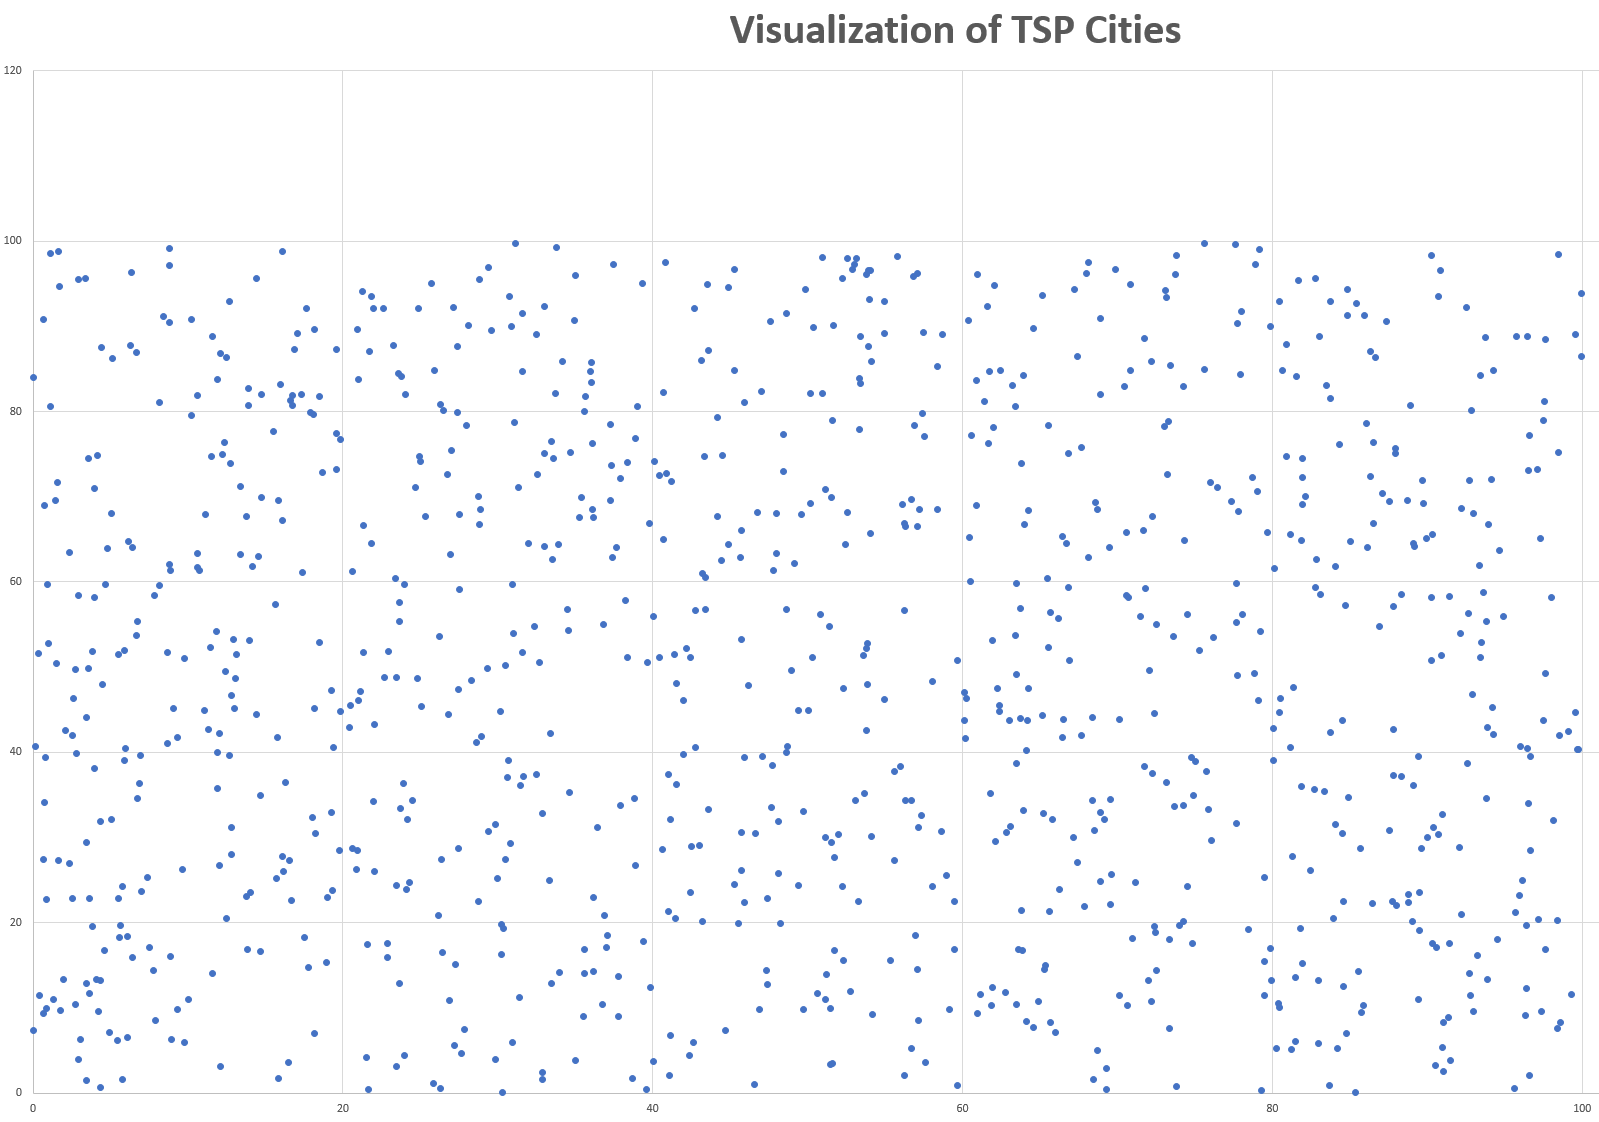

In [32]:
import PIL.Image as pilimg
pure_img = pilimg.open('visualization_cities.PNG')
pure_img

In [18]:
#우리의 데이터
print(cities[:3])

[['53.25009344431329', '22.444885209100597'], ['21.570928175048255', '17.44707561216037'], ['72.16107675668404', '85.88179688723211']]


# k-means

In [166]:
from sklearn.cluster import KMeans
k= 10 # 클러스터의 개수를 미리 지정(0~9)
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(cities)
print("y_pred의 개수 : ",len(y_pred))
print(y_pred[:50])

y_pred의 개수 :  1000
[4 8 3 9 0 4 3 0 9 4 5 6 4 3 3 6 1 5 2 5 6 0 5 9 7 6 1 6 1 4 0 0 7 8 0 7 7
 9 8 2 8 7 7 5 7 9 6 1 2 0]


In [24]:
kmeans.cluster_centers_

array([[84.66517788, 58.31166568],
       [14.39172077, 48.37407849],
       [63.34464357, 39.12516159],
       [43.02989295, 63.85317505],
       [18.29644879, 84.02650816],
       [14.68351174, 16.90088203],
       [55.2562836 , 88.07263076],
       [84.16080379, 87.69181194],
       [85.60140521, 16.96351047],
       [48.16347494, 16.94158371]])

In [131]:
kmeans.cluster_centers_[0]

array([84.66517788, 58.31166568])

In [134]:
x_cen =[]
y_cen=[]
for i in range (0,10):
    x_cen.append(kmeans.cluster_centers_[i][0])
    y_cen.append(kmeans.cluster_centers_[i][1])
x_cen

[84.66517787972234,
 14.39172076774286,
 63.344643565235366,
 43.02989295092647,
 18.29644878971088,
 14.683511737252104,
 55.25628360302678,
 84.16080379241654,
 85.60140520755397,
 48.163474938302905]

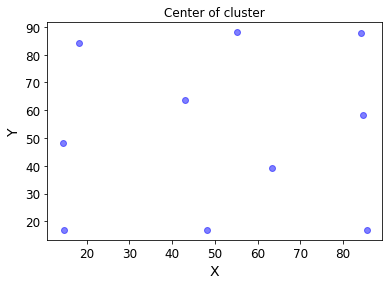

In [169]:
#scatter plot 데이터를 생성
x = x_cen
y = y_cen

plt.scatter(x,y,c='b',alpha= 0.5) #->그래프의 객체 생성
#alpha는 점들의 크기 label은 설명란
#plt.legend(loc = 'upper right') #밑에 Scatter point 박스의 위치를 선정 
plt.xlabel('X') #--->x축의 제목
plt.ylabel('Y') #--->y축의 제목
plt.title("Center of cluster") # ---> 그래프 제목
plt.show()  #-> 그래프를 출력

# 데이터 분할

In [170]:
index_0 = []
index_1 = []
index_2 = []
index_3 = []
index_4 = []
index_5 = []
index_6 = []
index_7 = []
index_8 = []
index_9 = []
for idx in range (0,1000):
    if y_pred[idx] == 0:
        index_0.append(int(idx))
        
    elif y_pred[idx] == 1:
        index_1.append(int(idx))
        
    elif  y_pred[idx] == 2:
        index_2.append(int(idx))
        
    elif  y_pred[idx] == 3:
        index_3.append(int(idx))  
        
    elif  y_pred[idx] == 4:
        index_4.append(int(idx))     
        
    elif  y_pred[idx] == 5:
        index_5.append(int(idx))  
        
    elif  y_pred[idx] == 6:
        index_6.append(int(idx))
        
    elif  y_pred[idx] == 7:
        index_7.append(int(idx))
        
    elif  y_pred[idx] == 8:
        index_8.append(int(idx))
        
    else:
        index_9.append(int(idx))        
    

In [89]:
#이중배열로 해결해보자
index_total = []
index_total.append(index_0)
index_total.append(index_1)
index_total.append(index_2)
index_total.append(index_3)
index_total.append(index_4)
index_total.append(index_5)
index_total.append(index_6)
index_total.append(index_7)
index_total.append(index_8)
index_total.append(index_9)

In [100]:
print(index_total[5])

[1, 33, 38, 40, 69, 77, 84, 111, 126, 140, 148, 157, 172, 191, 197, 202, 209, 212, 216, 227, 229, 241, 260, 266, 268, 270, 279, 282, 304, 307, 313, 315, 325, 334, 338, 339, 351, 353, 355, 359, 363, 364, 379, 381, 394, 408, 421, 425, 427, 428, 450, 451, 452, 461, 466, 470, 471, 475, 493, 501, 504, 526, 533, 556, 558, 560, 570, 577, 584, 595, 597, 605, 607, 608, 611, 615, 622, 629, 631, 639, 661, 666, 692, 698, 721, 743, 755, 761, 769, 770, 789, 801, 802, 807, 814, 817, 830, 838, 845, 853, 856, 873, 894, 895, 900, 902, 913, 933, 934, 937, 945, 947, 949, 971, 982]


In [41]:
print("index_0 : ",len(index_0), "\n","index_1 : ",len(index_1), "\n","index_2 : ",len(index_2), "\n","index_3 : ",len(index_3), "\n","index_4 : ",len(index_4), "\n",
      "index_5 : ",len(index_5), "\n","index_6 : ",len(index_6), "\n","index_7 : ",len(index_7), "\n","index_8 : ",len(index_8), "\n","index_9 : ",len(index_9))

index_0 :  108 
 index_1 :  111 
 index_2 :  91 
 index_3 :  99 
 index_4 :  115 
 index_5 :  115 
 index_6 :  77 
 index_7 :  67 
 index_8 :  109 
 index_9 :  108


# 가시화

In [114]:
print(cities[:5])

[['53.25009344431329', '22.444885209100597'], ['21.570928175048255', '17.44707561216037'], ['72.16107675668404', '85.88179688723211'], ['52.59628100814437', '68.0997652916171'], ['99.55503411642916', '89.03868014012214']]


In [98]:
#print(index_0[2])
print(cities[index_0[2]])
print(cities[index_0[2]][0])

['94.6667404260709', '63.71877389783837']
94.6667404260709


In [171]:
print(index_total[5])
count=0
for i in index_total[5]:
    print(cities[i][0])
    count = count+1
    if count== 10:
        break

[1, 33, 38, 40, 69, 77, 84, 111, 126, 140, 148, 157, 172, 191, 197, 202, 209, 212, 216, 227, 229, 241, 260, 266, 268, 270, 279, 282, 304, 307, 313, 315, 325, 334, 338, 339, 351, 353, 355, 359, 363, 364, 379, 381, 394, 408, 421, 425, 427, 428, 450, 451, 452, 461, 466, 470, 471, 475, 493, 501, 504, 526, 533, 556, 558, 560, 570, 577, 584, 595, 597, 605, 607, 608, 611, 615, 622, 629, 631, 639, 661, 666, 692, 698, 721, 743, 755, 761, 769, 770, 789, 801, 802, 807, 814, 817, 830, 838, 845, 853, 856, 873, 894, 895, 900, 902, 913, 933, 934, 937, 945, 947, 949, 971, 982]
21.570928175048255
26.346852969565404
17.540302503015702
26.87901792502101
3.6518039660328627
30.956671417109515
12.130925264383452
0.8813988650548166
26.307006429923717
4.341166407307117


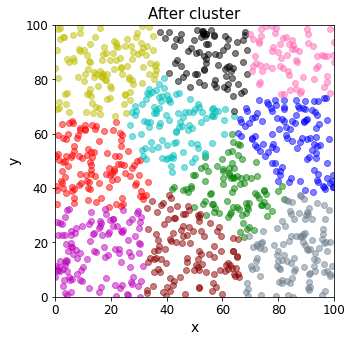

In [176]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("After cluster", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

x_0=[]
y_0=[]
for m in index_total[0]:
    x_0.append(float(cities[m][0]))
    y_0.append(float(cities[m][1]))

plt.scatter(x_0,y_0,alpha=0.5, c="b")

for m in index_total[1]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="r")
for m in index_total[2]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="g")
for m in index_total[3]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="c")
for m in index_total[4]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="y")
for m in index_total[5]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="m")
for m in index_total[6]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="k")
for m in index_total[7]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="hotpink")
for m in index_total[8]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="slategray")
for m in index_total[9]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="darkred")

#c = 'b,g,r,c,y,m,k,w'  -> color

#plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
#plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")

plt.show()




# BFS구현

tree를 직접 구현하기 까다로움     
idea: tree 부분만 handwritting?